In [309]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

pd.set_option('display.max_rows', 100) # Set maximum displayed rows
pd.set_option('display.max_columns', 100) # Set maximum displayed columns
pd.set_option('display.max_colwidth', None)

In [310]:
meta_data = {
    "AcceptedCmp1": "1 if costumer accepted the offer in the 1st campaign, 0 otherwise",
    "AcceptedCmp2": "1 if costumer accepted the offer in the 2nd campaign, 0 otherwise",
    "AcceptedCmp3": "1 if costumer accepted the offer in the 3rd campaign, 0 otherwise",
    "AcceptedCmp4": "1 if costumer accepted the offer in the 4th campaign, 0 otherwise",
    "AcceptedCmp5": "1 if costumer accepted the offer in the 5th campaign, 0 otherwise",
    "Response (target)": "1 if costumer accepted the offer in the last campaign, 0 otherwise",
    "Complain": "1 if costumer complained in the last 2 years",
    "DtCustomer": "date of customer's enrollment with the company",
    "Education": "customer's level of education",
    "Marital": "customer's marital status",
    "Kidhome": "number of small children in customer's household",
    "Teenhome": "number of teenagers in customer's household",
    "Income": "customer's yearly household income",
    "MntFishProducts": "amount spent on fish products in the last 2 years",
    "MntMeatProducts": "amount spent on meat products in the last 2 years",
    "MntFruits": "amount spent on fruits in the last 2 years",
    "MntSweetProducts": "amount spent on sweet products in the last 2 years",
    "MntWines": "amount spent on wines in the last 2 years",
    "MntGoldProds": "amount spent on gold products in the last 2 years",
    "NumDealsPurchases": "number of purchases made with discount",
    "NumCatalogPurchases": "number of purchases made using catalogue",
    "NumStorePurchases": "number of purchases made directly in stores",
    "NumWebPurchases": "number of purchases made through company's web site",
    "NumWebVisitsMonth": "number of visits to company's web site in the last month",
    "Recency": "number of days since the last purchase"
}

metadata_df = pd.DataFrame.from_dict(meta_data, orient='index', columns=['Description'])
metadata_df.index.name = 'Feature'
metadata_df = metadata_df.reset_index()
metadata_df

,Feature,Description
0,AcceptedCmp1,"1 if costumer accepted the offer in the 1st campaign, 0 otherwise"
1,AcceptedCmp2,"1 if costumer accepted the offer in the 2nd campaign, 0 otherwise"
2,AcceptedCmp3,"1 if costumer accepted the offer in the 3rd campaign, 0 otherwise"
3,AcceptedCmp4,"1 if costumer accepted the offer in the 4th campaign, 0 otherwise"
4,AcceptedCmp5,"1 if costumer accepted the offer in the 5th campaign, 0 otherwise"
5,Response (target),"1 if costumer accepted the offer in the last campaign, 0 otherwise"
6,Complain,1 if costumer complained in the last 2 years
7,DtCustomer,date of customer's enrollment with the company
8,Education,customer's level of education
9,Marital,customer's marital status


In [311]:
df = pd.read_csv('ifood_dataset.csv').sort_index(axis=1)
df.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Dt_Customer,Education,ID,Income,Kidhome,Marital_Status,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,Year_Birth,Z_CostContact,Z_Revenue
0,0,0,0,0,0,0,2012-09-04,Graduation,5524,58138.0,0,Single,172,88,88,546,88,635,10,3,4,8,7,58,1,0,1957,3,11
1,0,0,0,0,0,0,2014-03-08,Graduation,2174,46344.0,1,Single,2,1,6,6,1,11,1,2,2,1,5,38,0,1,1954,3,11
2,0,0,0,0,0,0,2013-08-21,Graduation,4141,71613.0,0,Together,111,49,42,127,21,426,2,1,10,8,4,26,0,0,1965,3,11
3,0,0,0,0,0,0,2014-02-10,Graduation,6182,26646.0,1,Together,10,4,5,20,3,11,0,2,4,2,6,26,0,0,1984,3,11
4,0,0,0,0,0,0,2014-01-19,PhD,5324,58293.0,1,Married,46,43,15,118,27,173,3,5,6,5,5,94,0,0,1981,3,11


In [312]:
df = df.drop_duplicates()

In [313]:
cost_of_campaign = 3 * len(df)
revenue_campaign = 11 * len(df[df['Response'] == 1])

print(f"cost_of_campaign = {cost_of_campaign} MU")
print(f"revenue_campaign = {revenue_campaign} MU")
print(f"profit_campaign = {revenue_campaign - cost_of_campaign} MU")

cost_of_campaign = 6720 MU
revenue_campaign = 3674 MU
profit_campaign = -3046 MU


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AcceptedCmp1         2240 non-null   int64  
 1   AcceptedCmp2         2240 non-null   int64  
 2   AcceptedCmp3         2240 non-null   int64  
 3   AcceptedCmp4         2240 non-null   int64  
 4   AcceptedCmp5         2240 non-null   int64  
 5   Complain             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Education            2240 non-null   object 
 8   ID                   2240 non-null   int64  
 9   Income               2216 non-null   float64
 10  Kidhome              2240 non-null   int64  
 11  Marital_Status       2240 non-null   object 
 12  MntFishProducts      2240 non-null   int64  
 13  MntFruits            2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  MntMeatProducts      2240 non-null   i

In [315]:
df.isna().sum()

AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Complain                0
Dt_Customer             0
Education               0
ID                      0
Income                 24
Kidhome                 0
Marital_Status          0
MntFishProducts         0
MntFruits               0
MntGoldProds            0
MntMeatProducts         0
MntSweetProducts        0
MntWines                0
NumCatalogPurchases     0
NumDealsPurchases       0
NumStorePurchases       0
NumWebPurchases         0
NumWebVisitsMonth       0
Recency                 0
Response                0
Teenhome                0
Year_Birth              0
Z_CostContact           0
Z_Revenue               0
dtype: int64

In [316]:
df.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Dt_Customer,Education,ID,Income,Kidhome,Marital_Status,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,Year_Birth,Z_CostContact,Z_Revenue
0,0,0,0,0,0,0,2012-09-04,Graduation,5524,58138.0,0,Single,172,88,88,546,88,635,10,3,4,8,7,58,1,0,1957,3,11
1,0,0,0,0,0,0,2014-03-08,Graduation,2174,46344.0,1,Single,2,1,6,6,1,11,1,2,2,1,5,38,0,1,1954,3,11
2,0,0,0,0,0,0,2013-08-21,Graduation,4141,71613.0,0,Together,111,49,42,127,21,426,2,1,10,8,4,26,0,0,1965,3,11
3,0,0,0,0,0,0,2014-02-10,Graduation,6182,26646.0,1,Together,10,4,5,20,3,11,0,2,4,2,6,26,0,0,1984,3,11
4,0,0,0,0,0,0,2014-01-19,PhD,5324,58293.0,1,Married,46,43,15,118,27,173,3,5,6,5,5,94,0,0,1981,3,11


In [317]:
df.describe().sort_index(axis=1)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,ID,Income,Kidhome,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,Year_Birth,Z_CostContact,Z_Revenue
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0
mean,0.064286,0.013393,0.072768,0.074554,0.072768,0.009375,5592.159821,52247.251354,0.444196,37.525446,26.302232,44.021875,166.950000,27.062946,303.935714,2.662054,2.325000,5.790179,4.084821,5.316518,49.109375,0.149107,0.506250,1968.805804,3.0,11.0
std,0.245316,0.114976,0.259813,0.262728,0.259813,0.096391,3246.662198,25173.076661,0.538398,54.628979,39.773434,52.167439,225.715373,41.280498,336.597393,2.923101,1.932238,3.250958,2.778714,2.426645,28.962453,0.356274,0.544538,11.984069,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1893.000000,3.0,11.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2828.250000,35303.000000,0.000000,3.000000,1.000000,9.000000,16.000000,1.000000,23.750000,0.000000,1.000000,3.000000,2.000000,3.000000,24.000000,0.000000,0.000000,1959.000000,3.0,11.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5458.500000,51381.500000,0.000000,12.000000,8.000000,24.000000,67.000000,8.000000,173.500000,2.000000,2.000000,5.000000,4.000000,6.000000,49.000000,0.000000,0.000000,1970.000000,3.0,11.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8427.750000,68522.000000,1.000000,50.000000,33.000000,56.000000,232.000000,33.000000,504.250000,4.000000,3.000000,8.000000,6.000000,7.000000,74.000000,0.000000,1.000000,1977.000000,3.0,11.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11191.000000,666666.000000,2.000000,259.000000,199.000000,362.000000,1725.000000,263.000000,1493.000000,28.000000,15.000000,13.000000,27.000000,20.000000,99.000000,1.000000,2.000000,1996.000000,3.0,11.0


- No more than 2 children
- Last purchase is less than 100 days
- Slight increase of people accepting campaings. Still, less than 8% accepted them.
- Very small amount of people complaining, less than 1%.
- On average, clients are client for more than 4 years
- The average client age is 55 years old
- Clients spend on average R$605
- On average, clients have one child
- On average, clients accepted 2x more the last campaign compared to campaign 5
- On average, rounding above, ~6 access to store purchases, ~3 catalogue, and ~4 website purchases. ~2 purchases with discount on average. On average, ~13 total purchases.


## Feature Engineering
Let's create some variables to help with our analysis

In [318]:
df['MntRegProds'] = (df['MntWines'] + df['MntMeatProducts'] + df['MntFruits'] + df['MntFishProducts'] + df['MntSweetProducts'] - df['MntGoldProds'])

In [319]:
df['MntTotal'] = df[['MntWines', 'MntMeatProducts', 'MntFruits', 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)

In [320]:
df['MntTotal'].describe()

count    2240.000000
mean      561.776339
std       576.613680
min         4.000000
25%        55.000000
50%       341.000000
75%       964.000000
max      2491.000000
Name: MntTotal, dtype: float64

In [321]:
current_year = 2014

today = pd.Timestamp(pd.to_datetime(f'{current_year}-12-12', format='%Y-%m-%d'))
dt_column = pd.to_datetime(df.Dt_Customer, format='%Y-%m-%d')
df["Dt_Customer"] = dt_column
days_with_company = (today - df['Dt_Customer']).dt.days
df['Days_With_Company'] = days_with_company

df.drop(columns=["Dt_Customer"], inplace=True)

In [322]:
df["NumTotalPurchases"] = df["NumCatalogPurchases"] + df["NumStorePurchases"] + df["NumWebPurchases"]

In [323]:
df["NumAcceptedCmp"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"] + df['Response']

In [324]:
df["CustomerAge"] = current_year - df["Year_Birth"]

def map_age(x):
    if x < 40:
        return 0 # 'Young'
    elif x < 60:
        return 1 # 'MiddleAge'
    else:
        return 2 # 'Old'

df["AgeGroup"] = df["CustomerAge"].map(map_age)

In [325]:
df["NumChildren"] = df["Kidhome"] + df["Teenhome"]

In [326]:
def map_income(x):
    num_months_year = 12
    min_salary = 1412
    if x <= min_salary * num_months_year:
        return 0 # 'E'
    elif x <= 3 * min_salary * num_months_year:
        return 1 # 'D'
    elif x <= 5 * min_salary * num_months_year:
        return 2 # 'C'
    elif x <= 15 * min_salary * num_months_year:
        return 3 # 'B'
    else:
        return 4 # 'A'

df["SalaryRange"] = df["Income"].map(map_income)

## Business Questions to answer

1. Can we identify distinct groups of customers based on their behavior, who will be more inclined to buy the gadget and should be targeted by the next campaign?
2. Which segments should be targeted by the next campaign to maximize profit, and what is the expected return of each segment?


## Business Questions to answer

### Customer Behavior and Segmentation:

- Who are our most valuable customers? (income, total spending, total purchases, campaign responses)
- Do clients that buy more also adhere more to campaigns?
- Do high income clients tend to adhere more to campaigns?
- How do different customer segments behave?
- What are the characteristics of customers who respond to our marketing campaigns?
- What is the impact of a campaign on spending?
- Is there any impact in the number of products bought based on the income?
- Are there any correlations between income and number of children/teenagers at home?

### Marketing Campaign Effectiveness

- Which marketing campaigns were most successful?
- Are there specific customer groups more inclined to accept certain offers?

### Product and Channel Performance
- Which product categories are most popular?
- What are the preferred purchase channels?

## Analysis

Check if values within binary columns are valid

In [327]:
campaign_columns = ["AcceptedCmp1",	"AcceptedCmp2", "AcceptedCmp3",	"AcceptedCmp4",	"AcceptedCmp5", "Response"]

In [328]:
binary_cols = [
    "AcceptedCmp1",	"AcceptedCmp2", "AcceptedCmp3",	"AcceptedCmp4",	"AcceptedCmp5",	"Complain", 'Response'
]
for col in binary_cols:
    counter = df[col].value_counts().sort_index()
    assert list(counter.index) == [0, 1]

In [329]:
numeric_columns = [
    "Income",
    "Kidhome",
    "Teenhome",
    "MntWines",
    "MntMeatProducts",
    "MntFruits",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumCatalogPurchases",
    "NumDealsPurchases",
    "NumStorePurchases",
    "NumWebPurchases",
    "NumWebVisitsMonth",
    "Recency",
    "Year_Birth",
    "Complain"
]														

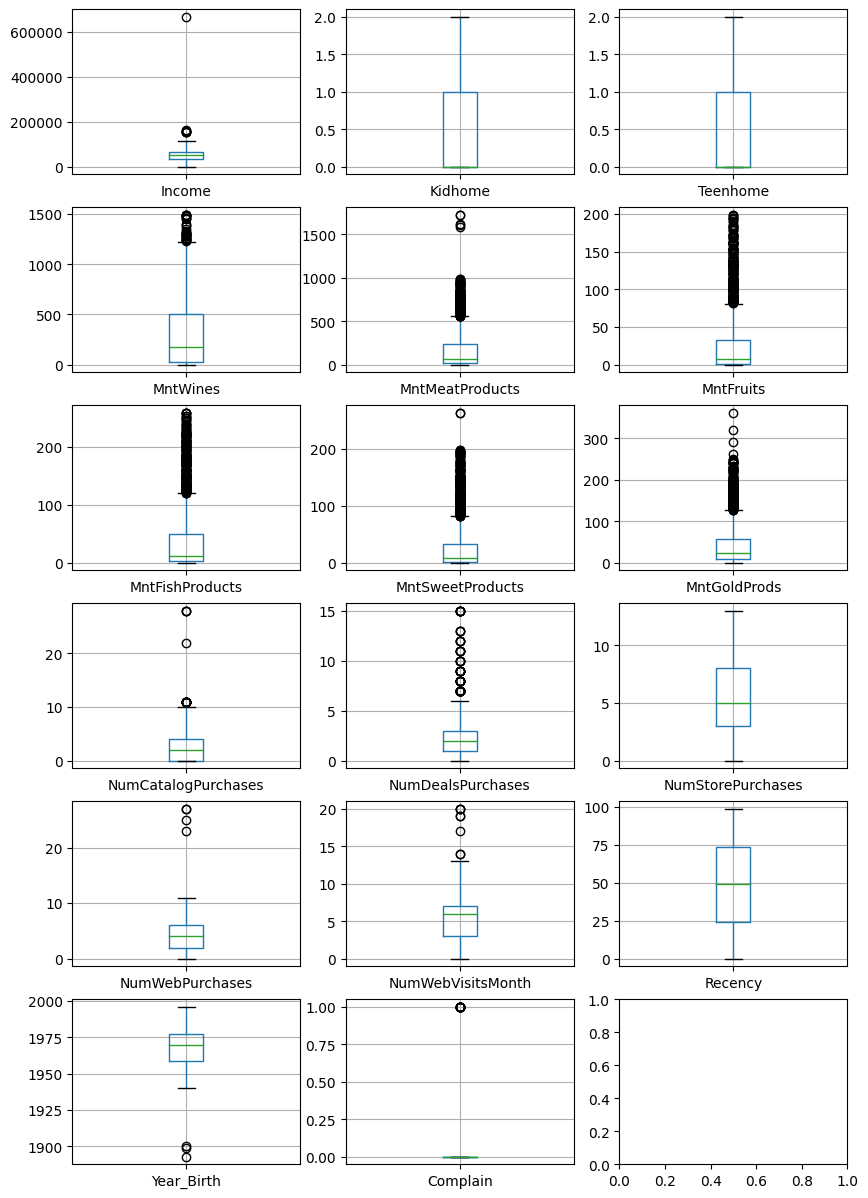

In [330]:
ncols = 3
nrows = int(np.ceil(len(numeric_columns) / ncols))
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 15))

for i, column in enumerate(numeric_columns):
    df.boxplot(column=column, ax=ax[i // ncols, i % ncols])
plt.show()

- There is some clear outliers in columns `Income`, `Year_Birth`. We'll drop those below.

In [331]:
assert len(df['ID'].value_counts()) == len(df)

In [332]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [333]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

- We'll change `Married` to `Together`, `Alone` to `Single`, and we'll drop `Absurd` and `YOLO`.

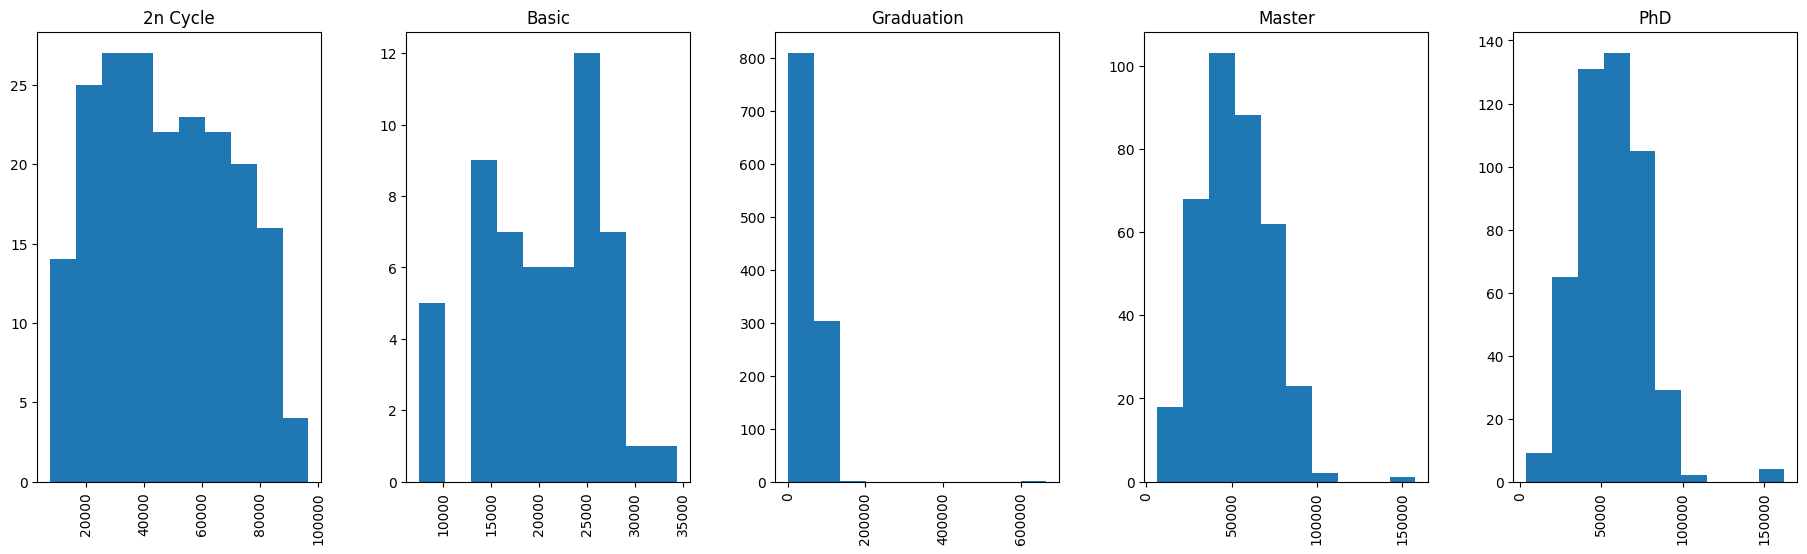

In [334]:
df.hist(column="Income", by="Education", figsize=(22, 6), layout=(1, 5))
plt.show()

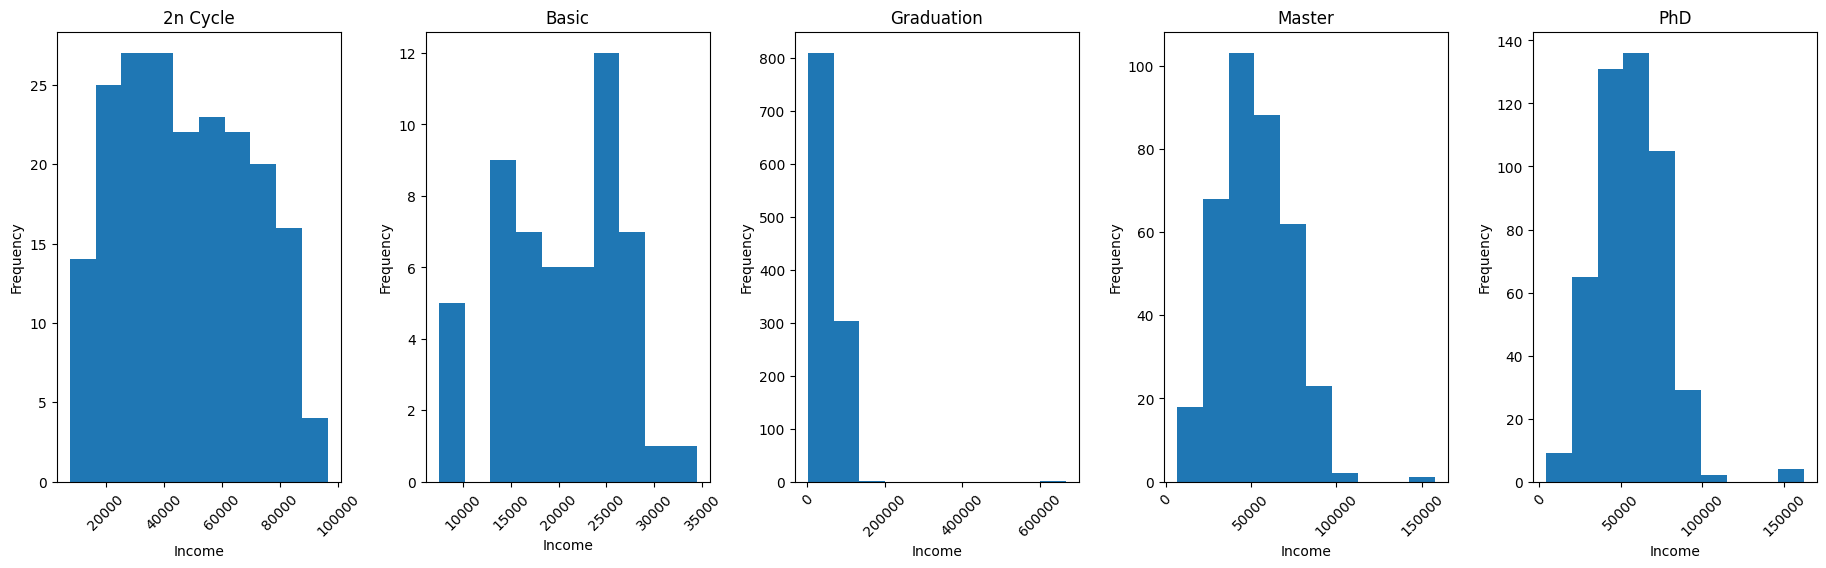

In [335]:
axs = df.hist(column="Income", by="Education", xrot=45, figsize=(22, 6), layout=(1, 5))

for ax in axs:
    ax.set_xlabel('Income')
    ax.set_ylabel('Frequency')

plt.show()

- Both Graduation and Master seems to have similar income
- PhD have a slightly better income than Master and Graduation
- Have a university course yields better income on average than a Basic or 2nd Cycle education

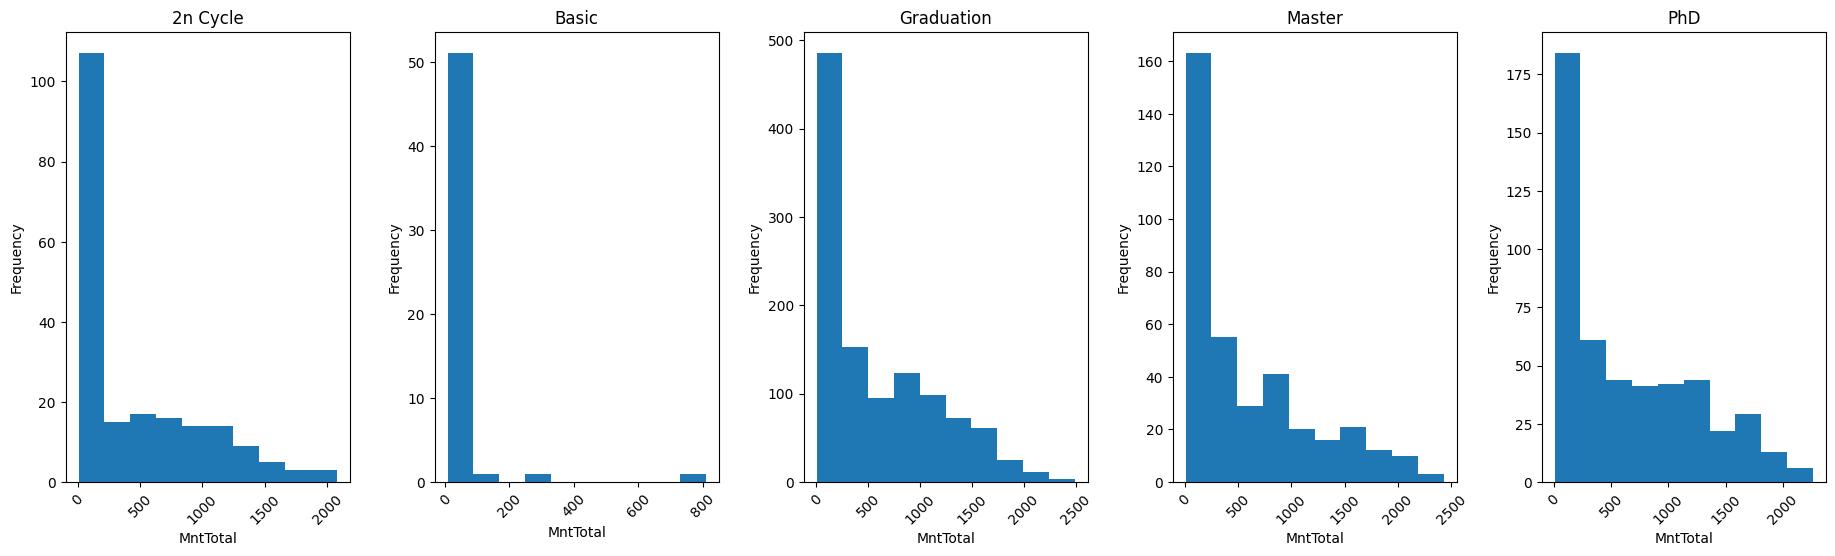

In [336]:
axs = df.hist(column="MntTotal", by="Education", xrot=45, figsize=(22, 6), layout=(1, 5))

for ax in axs:
    ax.set_xlabel('MntTotal')
    ax.set_ylabel('Frequency')
plt.show()

- People within 2nd Cycle tend to earn more than Basic cycle, which makes sense since it has higher education
- People earning more than R$200k yearly are negligible. We'll remove the outliers (more than R$200k). Because of this outlier, it's difficult to visualize `Graduation` plot.

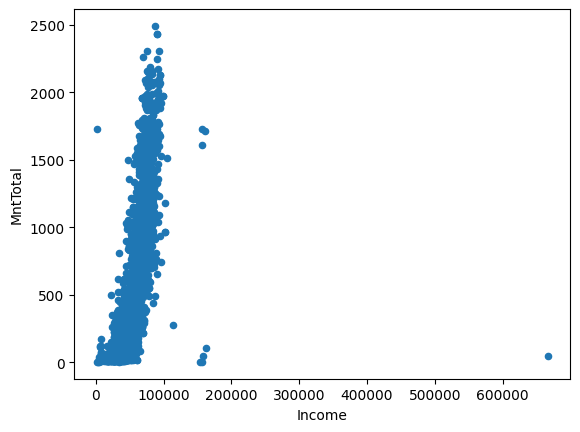

In [337]:
import seaborn as sns
import matplotlib.pyplot as plt

df[["Income", "MntTotal"]].plot.scatter(x='Income', y='MntTotal')
plt.show()

- There is a positive correlation between income and total amount of consumed items, which was already noticed before

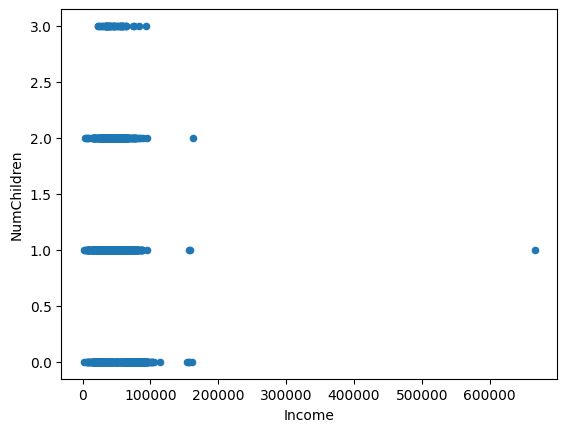

In [338]:
df[["Income", "NumChildren"]].plot.scatter(x='Income', y='NumChildren')
plt.show()

- Nothing special about the correlation between income and number of children

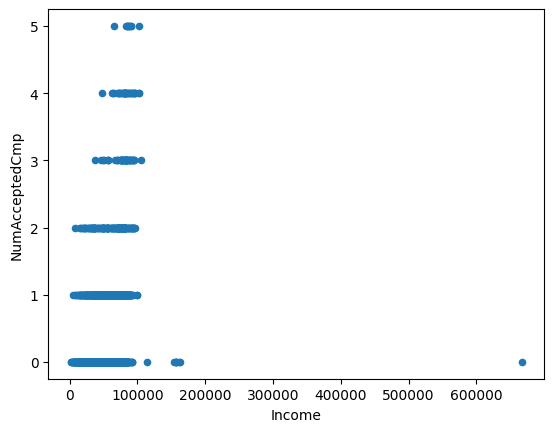

In [339]:
df[["Income", "NumAcceptedCmp"]].plot.scatter(x='Income', y='NumAcceptedCmp')
plt.show()

- It looks like there is a smooth positive correlation between the income and the amount of accepted campaigns

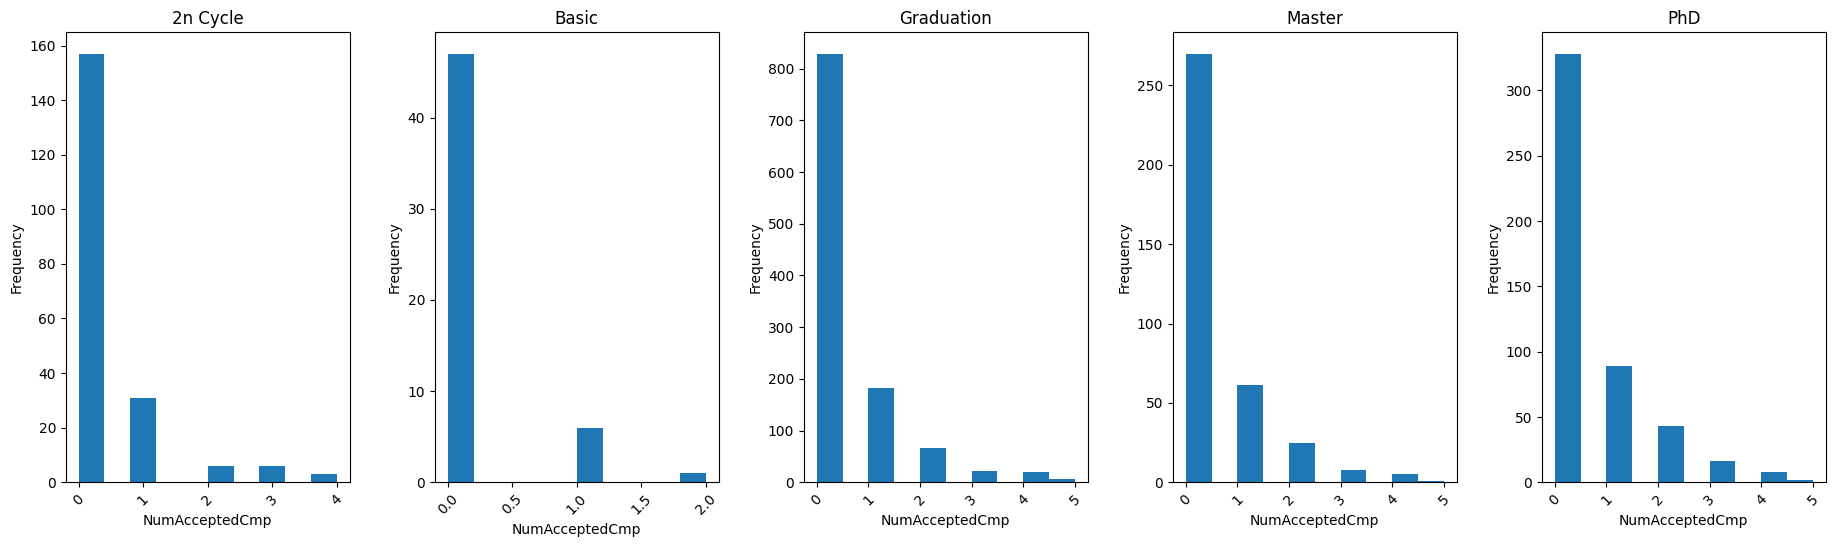

In [340]:
axs = df.hist(column="NumAcceptedCmp", by="Education", xrot=45, figsize=(22, 6), layout=(1, 5))

for ax in axs:
    ax.set_xlabel('NumAcceptedCmp')
    ax.set_ylabel('Frequency')
plt.show()

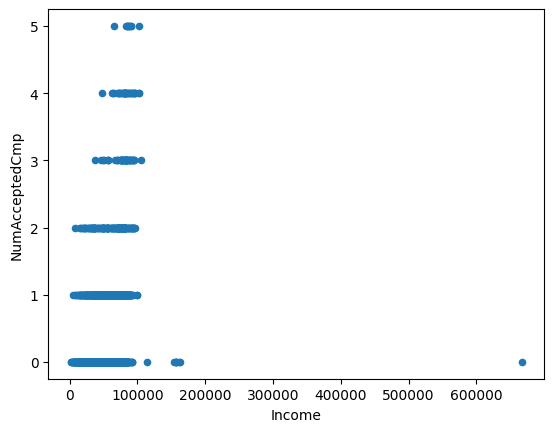

In [341]:
df[["Income", "NumAcceptedCmp"]].plot.scatter(x='Income', y='NumAcceptedCmp')
plt.show()

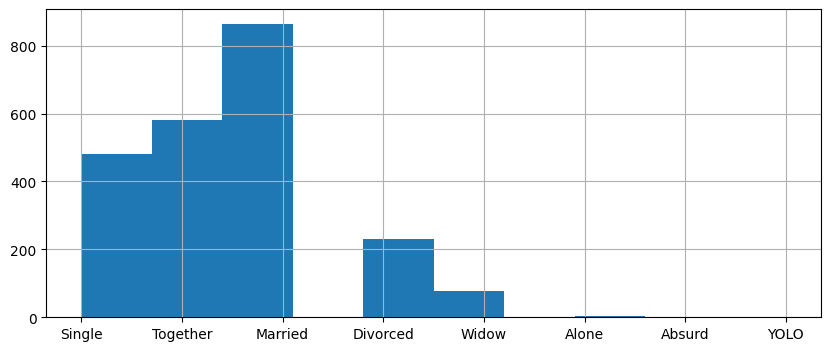

In [342]:
df['Marital_Status'].hist(figsize=(10, 4))
plt.show()

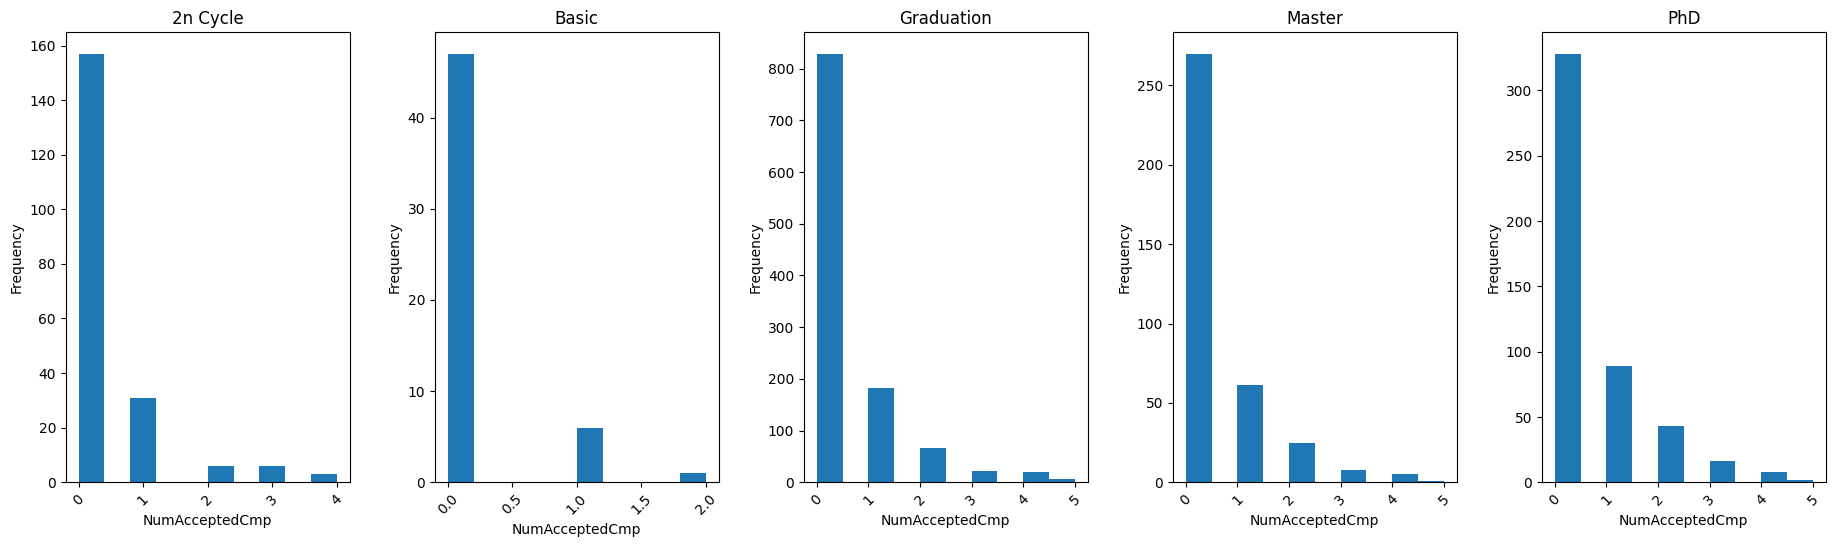

In [343]:
axs = df.hist(column="NumAcceptedCmp", by="Education", xrot=45, figsize=(22, 6), layout=(1, 5))

for ax in axs:
    ax.set_xlabel('NumAcceptedCmp')
    ax.set_ylabel('Frequency')
plt.show()

 - Does clients that visit the website more often spend more?

 Not at first sight.

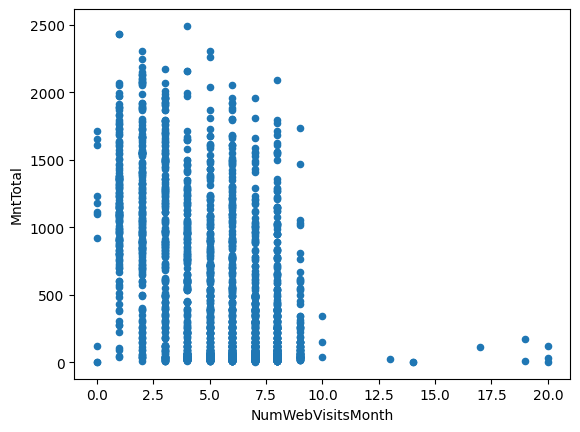

In [344]:
df[["NumWebVisitsMonth", "MntTotal"]].plot.scatter(x='NumWebVisitsMonth', y='MntTotal')
plt.show()

In [345]:
grouped_df = df.groupby(by="SalaryRange")[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "MntTotal"]].sum()
grouped_df

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal
SalaryRange,,,,,,,
0,789,414,2588,542,447,1974,4780
1,77010,7100,35287,11420,7282,21901,138099
2,527377,44633,275558,62959,44913,67149,955440
3,70898,6244,56612,8476,7253,6391,149483
4,4742,526,3923,660,726,1194,10577


In [346]:
grouped_df.div(grouped_df["MntTotal"], axis=0) * 100

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal
SalaryRange,,,,,,,
0,16.506276,8.661088,54.142259,11.338912,9.351464,41.297071,100.0
1,55.764343,5.141239,25.551959,8.269430,5.273029,15.858913,100.0
2,55.197291,4.671460,28.840953,6.589529,4.700766,7.028071,100.0
3,47.428805,4.177064,37.871865,5.670210,4.852057,4.275403,100.0
4,44.833128,4.973055,37.089912,6.239955,6.863950,11.288645,100.0


- Class B, C, D consume a similar amount of wine
- Class E don't consume a lot of wine
- Class E consume fruits the most, 2x more than the other classes
- Class B consume meat the most
- Class E consume fish the most, 2x more than class B
- Class E consume sweets the most, almost 2x more than the other classes
- Class B barely consumes gold products, while class E consumes the most of gold products, more than 10x more than class B

---

- Class B prefers wines and meat
- Class C prefers wines and meat
- Class D prefers wines, meat, and gold products
- Class E prefers gold products, wines, meat, and fish in this order 

In [347]:
grouped_df = df.groupby(by="AgeGroup")[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "MntTotal"]].sum()
grouped_df

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal
AgeGroup,,,,,,,
0,192188,20673,128049,29281,21279,32568,391470
1,362587,29343,182810,40522,29554,49407,644816
2,126041,8901,63109,14254,9788,16634,222093


In [348]:
grouped_df.div(grouped_df["MntTotal"], axis=0) * 100

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal
AgeGroup,,,,,,,
0,49.093928,5.280864,32.709786,7.479756,5.435666,8.319411,100.0
1,56.231080,4.550600,28.350723,6.284273,4.583323,7.662186,100.0
2,56.751451,4.007781,28.415574,6.418032,4.407163,7.489655,100.0


- Old people consume more wine than middle and young people, young consuming the least
- Young people consume fruits more than the other ages
- Young people consume meat mot than the other two ages. Those other two consume similar amounts of meat.
- The three ages consume similar amounts of fish.
- The three ages consume similar amounts of sweet, with the young consuming slightly more.
- Middle age people consume gold products the most, with the other two consuming similar amounts of gold product.

In [349]:
grouped_df = df.groupby(by=["AgeGroup", "SalaryRange"])[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "MntTotal"]].sum()
grouped_df

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
AgeGroup SalaryRange                                                          
0        0                 440        316             2334              348   
         1               20624       3012            13521             4872   
         2              141758      14469            85456            20569   
         3               28420       2713            24606             3407   
         4                 946        163             2132               85   
1        0                 303         86              212              168   
         1               43629       3409            16635             4790   
         2              285486      22899           140724            31341   
         3               30114       2717            24008             3818   
         4                3055        232             1231              405   
2        0                  46         12               42               26   
         1               12757        679             5131             1758   
         2              100133       7265            49378            11049   
         3               12364        814             7998             1251   
         4                 741        131              560              170   

                      MntSweetProducts  MntGoldProds  MntTotal  
AgeGroup SalaryRange                                            
0        0                         350          1066      3788  
         1                        3239          8630     45268  
         2                       14226         19733    276478  
         3                        3160          2668     62306  
         4                         304           471      3630  
1        0                          85           864       854  
         1                        2974         10427     71437  
         2                       23333         35094    503783  
         3                        2876          2456     63533  
         4                         286           566      5209  
2        0                          12            44       138  
         1                        1069          2844     21394  
         2                        7354         12322    175179  
         3                        1217          1267     23644  
         4                         136           157      1738

In [350]:
grouped_df.div(grouped_df["MntTotal"], axis=0) * 100

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
AgeGroup SalaryRange                                                           
0        0            11.615628   8.342133        61.615628         9.186906   
         1            45.559777   6.653707        29.868781        10.762570   
         2            51.272796   5.233328        30.908788         7.439652   
         3            45.613585   4.354316        39.492184         5.468173   
         4            26.060606   4.490358        58.732782         2.341598   
1        0            35.480094  10.070258        24.824356        19.672131   
         1            61.073393   4.772037        23.286252         6.705209   
         2            56.668447   4.545409        27.933455         6.221131   
         3            47.398990   4.276518        37.788236         6.009475   
         4            58.648493   4.453830        23.632175         7.775005   
2        0            33.333333   8.695652        30.434783        18.840580   
         1            59.628868   3.173787        23.983360         8.217257   
         2            57.160390   4.147187        28.187169         6.307263   
         3            52.292336   3.442734        33.826764         5.290983   
         4            42.635213   7.537399        32.220944         9.781358   

                      MntSweetProducts  MntGoldProds  MntTotal  
AgeGroup SalaryRange                                            
0        0                    9.239704     28.141499     100.0  
         1                    7.155165     19.064240     100.0  
         2                    5.145437      7.137277     100.0  
         3                    5.071743      4.282092     100.0  
         4                    8.374656     12.975207     100.0  
1        0                    9.953162    101.170960     100.0  
         1                    4.163109     14.596078     100.0  
         2                    4.631558      6.966095     100.0  
         3                    4.526781      3.865708     100.0  
         4                    5.490497     10.865809     100.0  
2        0                    8.695652     31.884058     100.0  
         1                    4.996728     13.293447     100.0  
         2                    4.197992      7.033948     100.0  
         3                    5.147183      5.358653     100.0  
         4                    7.825086      9.033372     100.0

- Less than 15% of middle age and young people from salary class E consume wine. On the other hand, more than 30% from all the other age or salary range consume wine. In special, more than 50% of old people consume wine considering any salary range, except by salary class E which is ~34%. The insight is that for young people, the wine consumption increase as we increase the salary range. For middle age people, class E doesn't consume as much wine as salary class D, C, and B. 
- Young people from salary class E consume considerably more fruits (at least 2x more) than the other classes and ages.
- For the meat consumption, the higher the salary class, the consumption increase regardless of age. The consumption difference between class E and B is almost 2.5x for all the three ages.
- For the fish consumption, the smaller the salary class, higher the consumption of fish regardless of age. For old people, class E consumes almost 3x more fish than class B.
- For sweet, young people from class E consume 2x more than all the other ages and classes.
- For gold product consumption, the smaller the salary class, more gold product is consumed. In special, middle age people from class E consumes the most compared to all classes and ages. In special, it consumes more than 10x more gold product than class B from the middle age. 

## Data Cleaning


In [351]:
df.dropna(inplace=True)
df.drop(columns=["ID", "Z_CostContact", "Z_Revenue", "SalaryRange", "AgeGroup",], inplace=True)

In [353]:
df = df[df["Income"] <= 200000] # drop outliers

We'll drop births smaller than 1940.

In [354]:
df = df[df['Year_Birth'] >= 1940]

In [355]:
df[df["Marital_Status"] == "Alone"]["Marital_Status"] = "Single"
df[df["Marital_Status"] == "Married"]["Marital_Status"] = "Together"
df = df[(df["Marital_Status"] == "Single") | (df["Marital_Status"] == "Together") | (df["Marital_Status"] == "Widow")]

/tmp/ipykernel_33489/3358864814.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_33489/3358864814.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [363]:
df['Education'].value_counts()

Graduation    565
PhD           235
Master        188
2n Cycle       96
Basic          33
Name: Education, dtype: int64

In [364]:
18 / 142

0.1267605633802817

In [365]:
def plot_accepted_cmp(column):
    ncmps = 5
    nrows = 6
    ncols = 2
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 34))

    def plot_num_acc(cmp, num_acc, ax):
        df[df[cmp] == num_acc][column].hist(ax=ax)
        ax.set_xlabel(cmp + " = " + str(num_acc))
        ax.set_ylabel('Frequency')
        ax.grid(True)

    for i in range(ncmps):
        ax = axs[i // ncols, i % ncols]
        plot_num_acc(f'AcceptedCmp{i + 1}', 1, ax)

    plot_num_acc(f'Response', 1, axs[2, 1])
    plot_num_acc(f'NumAcceptedCmp', 0, axs[3, 0])
    plot_num_acc(f'NumAcceptedCmp', 1, axs[3, 1])
    plot_num_acc(f'NumAcceptedCmp', 2, axs[4, 0])
    plot_num_acc(f'NumAcceptedCmp', 3, axs[4, 1])
    plot_num_acc(f'NumAcceptedCmp', 4, axs[5, 0])
    plot_num_acc(f'NumAcceptedCmp', 5, axs[5, 1])

    plt.show()

In [366]:
acc1 = df[df['AcceptedCmp1'] == 1]['Education'].value_counts()
# acc1 = pd.DataFrame(acc1, columns=["AcceptedCmp1"])
acc1

Graduation    38
PhD           16
Master         8
2n Cycle       5
Name: Education, dtype: int64

In [367]:
acc1 = df[df['AcceptedCmp1'] == 1]['Education'].value_counts()
acc2 = df[df['AcceptedCmp2'] == 1]['Education'].value_counts()
acc3 = df[df['AcceptedCmp3'] == 1]['Education'].value_counts()
acc4 = df[df['AcceptedCmp4'] == 1]['Education'].value_counts()
acc5 = df[df['AcceptedCmp5'] == 1]['Education'].value_counts()
response = df[df['Response'] == 1]['Education'].value_counts()
total = acc1 + acc2 + acc3 + acc4 + acc5 + response

tmp_df = pd.DataFrame([acc1, acc2, acc3, acc4, acc5, response, total]).T.fillna(0)
tmp_df.columns = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response", "Total"]
tmp_df

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Total
Graduation,38.0,10.0,38.0,42.0,46.0,89.0,263.0
PhD,16.0,6.0,19.0,19.0,15.0,49.0,124.0
Master,8.0,2.0,11.0,18.0,17.0,35.0,91.0
2n Cycle,5.0,0.0,7.0,5.0,3.0,9.0,0.0
Basic,0.0,0.0,4.0,0.0,0.0,2.0,0.0


In [368]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [369]:
variables_to_compare = ['Income', 'MntTotal', 'NumTotalPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'NumAcceptedCmp']
comparison_results_mean = df.groupby('Response')[variables_to_compare].mean()
comparison_results_mean

,Income,MntTotal,NumTotalPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,NumAcceptedCmp
Response,,,,,,,,
0,50362.436227,502.061093,11.965702,3.828510,2.426581,5.710611,5.23687,0.171490
1,59905.250000,941.342391,15.266304,5.086957,4.103261,6.076087,5.37500,1.918478


Percentage of clients that accepted each campaign

In [370]:
(df[campaign_columns].sum() / len(df)) * 100

AcceptedCmp1     5.998209
AcceptedCmp2     1.611459
AcceptedCmp3     7.072516
AcceptedCmp4     7.520143
AcceptedCmp5     7.251567
Response        16.472695
dtype: float64

In [371]:
df[df["Response"] == 1]['Education'].value_counts() / df[df["Response"] == 1]['Education'].value_counts().sum() * 100

Graduation    48.369565
PhD           26.630435
Master        19.021739
2n Cycle       4.891304
Basic          1.086957
Name: Education, dtype: float64

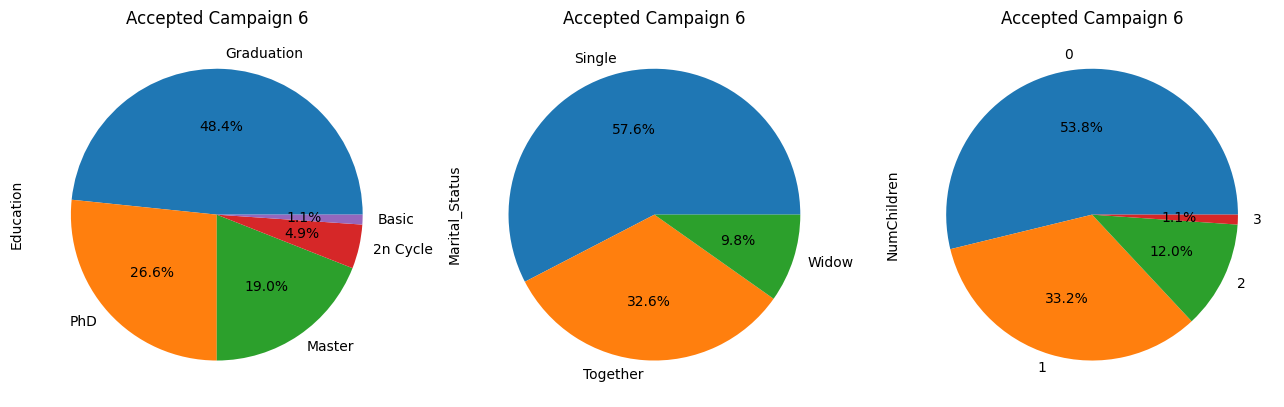

In [372]:
columns = ["Education", "Marital_Status", "NumChildren"]
fig, axs = plt.subplots(nrows=1, ncols=len(columns), figsize=(16, 34))

for i, column in enumerate(columns):
    ax = axs[i]
    (df[df["Response"] == 1][column].value_counts()).plot.pie(autopct='%1.1f%%', title="Accepted Campaign 6", startangle=0, ax=ax)
plt.show()

1. Quais são os segmentos de clientes que devemos priorizar para a próxima campanha do gadget?

2. Qual o perfil desses segmentos prioritários?

3. Quais estratégias de marketing (ofertas, mensagens, canais) devemos usar para cada segmento prioritário?

4. Quais produtos devemos focar?

In [373]:
df.select_dtypes(include=['int', 'float'])

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Income,Kidhome,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,Year_Birth,MntRegProds,MntTotal,Days_With_Company,NumTotalPurchases,NumAcceptedCmp,CustomerAge,NumChildren
0,0,0,0,0,0,0,58138.0,0,172,88,88,546,88,635,10,3,4,8,7,58,1,0,1957,1441,1529,829,22,1,57,0
1,0,0,0,0,0,0,46344.0,1,2,1,6,6,1,11,1,2,2,1,5,38,0,1,1954,15,21,279,4,0,60,2
2,0,0,0,0,0,0,71613.0,0,111,49,42,127,21,426,2,1,10,8,4,26,0,0,1965,692,734,478,20,0,49,0
3,0,0,0,0,0,0,26646.0,1,10,4,5,20,3,11,0,2,4,2,6,26,0,0,1984,43,48,305,6,0,30,1
5,0,0,0,0,0,0,62513.0,0,0,42,14,98,42,520,4,2,10,6,6,16,0,1,1967,688,702,459,20,0,47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,0,0,1,0,0,0,11012.0,1,7,3,23,26,1,24,1,3,2,3,9,82,0,0,1984,38,61,636,6,1,30,1
2231,0,0,0,0,0,0,44802.0,0,13,10,20,143,10,853,4,2,12,9,8,71,0,0,1970,1009,1029,843,25,0,44,0
2232,0,0,0,0,0,0,26816.0,0,3,1,3,6,4,5,0,1,3,0,4,50,0,0,1986,16,19,847,3,0,28,0
2236,1,0,0,0,0,0,64014.0,2,0,0,8,30,0,406,2,7,5,8,7,56,0,1,1946,428,436,185,15,1,68,3


In [374]:
def cluster_data(data):
    clustering_data = data

    scaler = StandardScaler()
    scaled_clustering_data = pd.DataFrame(scaler.fit_transform(clustering_data), columns=[clustering_data.columns, ])

    wcsse = []
    silhouettes = []
    number_clusters = []
    for i in range(2, 10):
        kmeans = KMeans(i, n_init=45, algorithm='elkan')
        kmeans.fit(scaled_clustering_data)
        wcsse_iter = kmeans.inertia_
        silhouette = silhouette_score(scaled_clustering_data, kmeans.labels_)
        silhouettes.append(silhouette)
        wcsse.append(wcsse_iter)
        number_clusters.append(i)
    
    # Plot the wcsse and sillhoutte score
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

    axs[0].set_title("wcsse")
    axs[0].plot(number_clusters, wcsse, '-o')
    axs[0].grid(True)
    axs[0].set_ylabel("Withing Cluster Sum of Squared Distances")

    axs[1].set_title("silhouette")
    axs[1].plot(number_clusters, silhouettes, '-o')
    axs[1].grid(True)
    axs[1].set_ylabel("Score")

    plt.show()

    return wcsse, silhouettes, number_clusters, scaled_clustering_data

In [375]:
df.select_dtypes(include=['int', 'float']).columns

Index(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Complain', 'Income', 'Kidhome', 'MntFishProducts',
       'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts',
       'MntWines', 'NumCatalogPurchases', 'NumDealsPurchases',
       'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Recency',
       'Response', 'Teenhome', 'Year_Birth', 'MntRegProds', 'MntTotal',
       'Days_With_Company', 'NumTotalPurchases', 'NumAcceptedCmp',
       'CustomerAge', 'NumChildren'],
      dtype='object')

In [376]:
df.columns

Index(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Complain', 'Education', 'Income', 'Kidhome',
       'Marital_Status', 'MntFishProducts', 'MntFruits', 'MntGoldProds',
       'MntMeatProducts', 'MntSweetProducts', 'MntWines',
       'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases',
       'NumWebPurchases', 'NumWebVisitsMonth', 'Recency', 'Response',
       'Teenhome', 'Year_Birth', 'MntRegProds', 'MntTotal',
       'Days_With_Company', 'NumTotalPurchases', 'NumAcceptedCmp',
       'CustomerAge', 'NumChildren'],
      dtype='object')

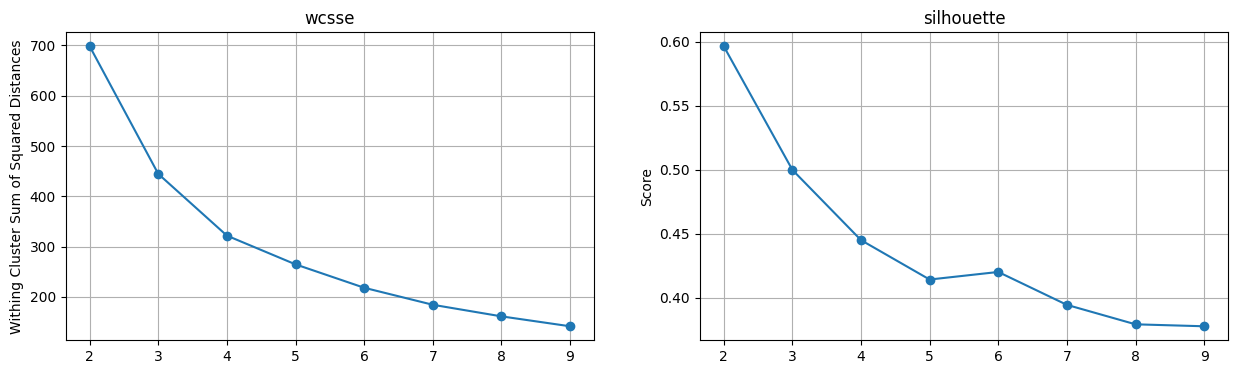

In [377]:
full_data = df[[
    "MntTotal",
    "Income",
    # "Recency",
    # "Days_With_Company",
    # "NumStorePurchases",
    # "Teenhome",
    # "NumWebVisitsMonth",
    # "MntMeatProducts",
    # "NumAcceptedCmp",
    # "MntGoldProds",
    # "MntWines",
    # "CustomerAge"
    # "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"
    # "Recency"
    # "NumTotalPurchases",
    # "Response",
    # "NumChildren",
    # "NumAcceptedCmp",
    # "Days_With_Company",
    # "Recency"
    # "NumCatalogPurchases", "NumDealsPurchases", "NumStorePurchases", "NumWebPurchases", "NumWebVisitsMonth"
]]

wcsse, silhouettes, number_clusters, scaled_clustering_data = cluster_data(full_data)

In [378]:
model = KMeans(n_clusters=3, init="random", max_iter=200, n_init=45, random_state=0)

new_full_data = df.copy()
new_full_data['Cluster'] = model.fit_predict(scaled_clustering_data)

print(np.unique(new_full_data['Cluster'], return_counts=True))

full_cluster_summary = new_full_data.groupby('Cluster').agg('mean').reset_index()
full_cluster_summary.T

(array([0, 1, 2], dtype=int32), array([324, 254, 539]))


/tmp/ipykernel_33489/622277202.py:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,0,1,2
Cluster,0.000000,1.000000,2.000000
AcceptedCmp1,0.033951,0.216535,0.001855
AcceptedCmp2,0.012346,0.047244,0.003711
AcceptedCmp3,0.049383,0.070866,0.083488
AcceptedCmp4,0.098765,0.173228,0.014842
AcceptedCmp5,0.021605,0.291339,0.000000
Complain,0.009259,0.007874,0.011132
Income,61289.981481,79064.228346,33525.883117
Kidhome,0.225309,0.043307,0.753247
MntFishProducts,44.376543,97.751969,9.484230


In [379]:
def plot_cluster_results(data):
    fig = px.scatter(
        data_frame=data,
        x = "MntTotal",
        y= "Recency",
        title = "Relationship between Income VS Recency",
        color = "Cluster",
        height=500
    )
    fig.show()
    fig = px.scatter(
        data_frame=data,
        x = "MntTotal",
        y= "Response",
        title = "Relationship between Income VS Response",
        color = "Cluster",
        height=500
    )
    fig.show()
    fig = px.scatter(
        data_frame=data,
        x = "MntTotal",
        y= "NumAcceptedCmp",
        title = "Relationship between Income VS NumAcceptedCmp",
        color = "Cluster",
        height=500
    )
    fig.show()
    fig = px.scatter(
        data_frame=data,
        x = "MntTotal",
        y= "NumTotalPurchases",
        title = "Relationship between Income VS Total Purchases",
        color = "Cluster",
        height=500
    )
    fig.show()
    fig = px.scatter(
        data_frame=data,
        x = "Income",
        y= "MntTotal",
        title = "Relationship between Income VS Total Amount Spent",
        color = "Cluster",
        height=500
    )
    fig.show()

    fig = px.scatter_3d(data_frame=data, x="Income", 
                        y="MntTotal", z="NumChildren", color="Cluster", height=550,
                    title = "Visualizing Cluster Result Using 3 Features")
    fig.show()

    fig = px.scatter_3d(data_frame=data, x="Income", 
                        y="MntTotal", z="NumAcceptedCmp", color="Cluster", height=550,
                    title = "Visualizing Cluster Result Using 3 Features")
    fig.show()

    fig = px.scatter_3d(data_frame=data, x="Income", 
                        y="MntTotal", z="NumTotalPurchases", color="Cluster", height=550,
                    title = "Visualizing Cluster Result Using 3 Features")
    fig.show()

    def plot_categorical_vars(data, cluster):
        columns = ["Education", "Marital_Status", "NumChildren"]
        fig, axs = plt.subplots(nrows=1, ncols=len(columns), figsize=(16, 34))
        for i, column in enumerate(columns):
            ax = axs[i]
            ax.set_title("Cluster " + str(cluster))
            (data[data["Cluster"] == cluster][column].value_counts()).plot.pie(autopct='%1.1f%%', startangle=0, ax=ax)
        plt.show()

    plot_categorical_vars(data, 0)
    plot_categorical_vars(data, 1)
    plot_categorical_vars(data, 2)

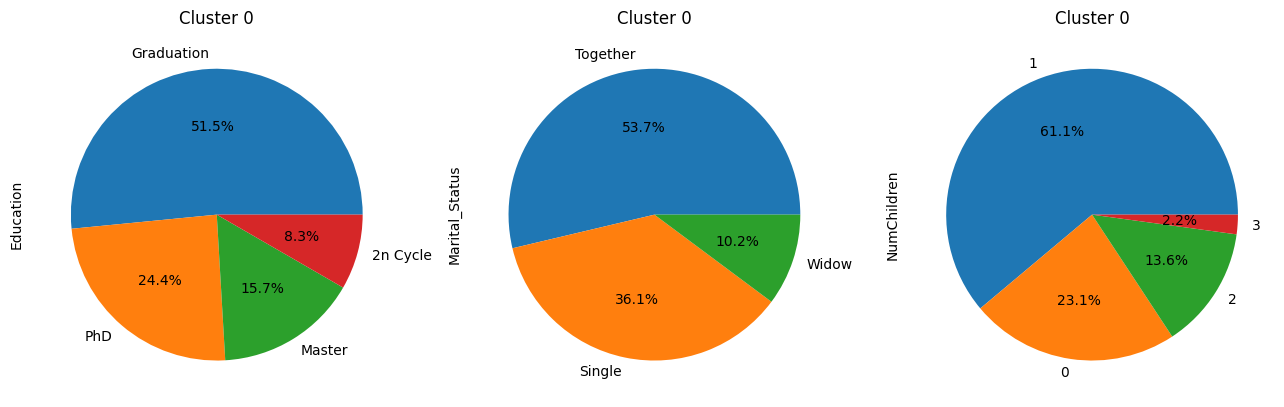

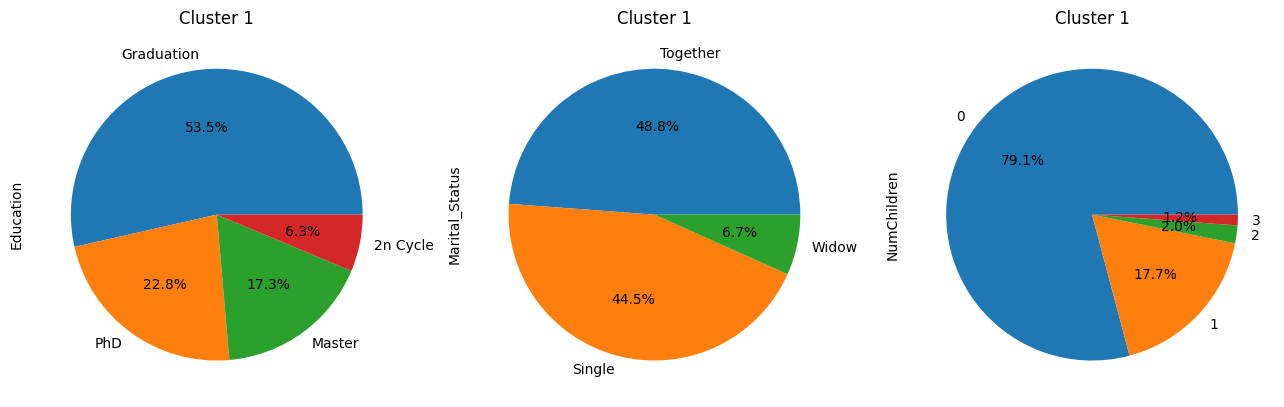

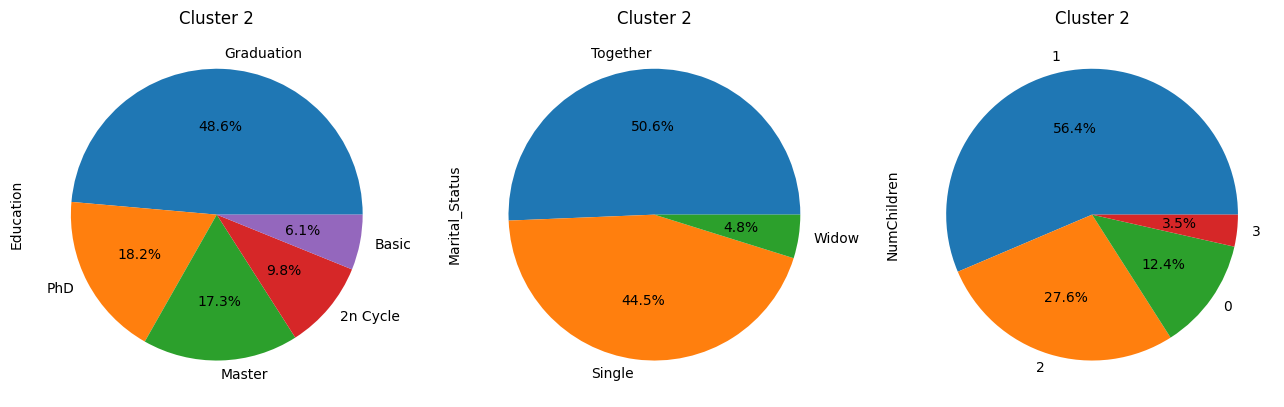

In [380]:
plot_cluster_results(new_full_data)

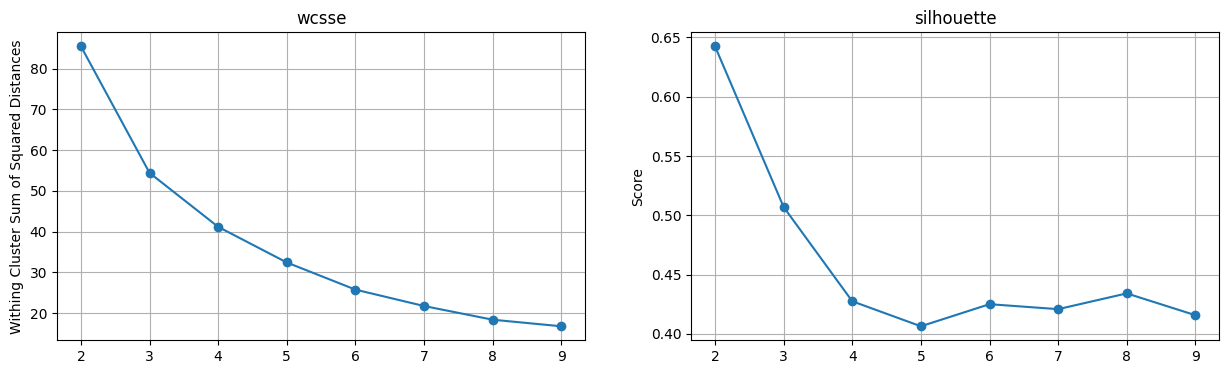

In [381]:
acc_cmp_data = df[df["Response"] == 1].select_dtypes(include=['int', 'float'])[["Income", "MntTotal"]]
wcsse, silhouettes, number_clusters, acc_cmp_scaled_clustering_data = cluster_data(acc_cmp_data)

In [382]:
model = KMeans(n_clusters=3, init="random", max_iter=100, n_init=45, random_state=0)

new_acc_cmp_data = df[df['Response'] == 1].copy()
new_acc_cmp_data['Cluster'] = model.fit_predict(acc_cmp_scaled_clustering_data)

print(np.unique(new_acc_cmp_data['Cluster'], return_counts=True))

sub_cluster_summary = new_acc_cmp_data.groupby('Cluster').agg('mean').reset_index()
sub_cluster_summary.T

(array([0, 1, 2], dtype=int32), array([72, 41, 71]))


/tmp/ipykernel_33489/3441939078.py:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,0,1,2
Cluster,0.000000,1.000000,2.000000
AcceptedCmp1,0.027778,0.097561,0.464789
AcceptedCmp2,0.013889,0.073171,0.098592
AcceptedCmp3,0.236111,0.170732,0.126761
AcceptedCmp4,0.069444,0.268293,0.295775
AcceptedCmp5,0.000000,0.146341,0.605634
Complain,0.027778,0.000000,0.014085
Income,34279.430556,64549.463415,83210.126761
Kidhome,0.777778,0.097561,0.014085
MntFishProducts,11.791667,50.804878,87.929577


In [383]:
#  column=
cmp = pd.concat([full_cluster_summary, sub_cluster_summary],)
cmp.index = ['full0', 'full1', 'full2', 'sub0', 'sub1', 'sub2']
cmp.sort_values(by='Income').T

,full2,sub0,full0,sub1,full1,sub2
Cluster,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000
AcceptedCmp1,0.001855,0.027778,0.033951,0.097561,0.216535,0.464789
AcceptedCmp2,0.003711,0.013889,0.012346,0.073171,0.047244,0.098592
AcceptedCmp3,0.083488,0.236111,0.049383,0.170732,0.070866,0.126761
AcceptedCmp4,0.014842,0.069444,0.098765,0.268293,0.173228,0.295775
AcceptedCmp5,0.000000,0.000000,0.021605,0.146341,0.291339,0.605634
Complain,0.011132,0.027778,0.009259,0.000000,0.007874,0.014085
Income,33525.883117,34279.430556,61289.981481,64549.463415,79064.228346,83210.126761
Kidhome,0.753247,0.777778,0.225309,0.097561,0.043307,0.014085
MntFishProducts,9.484230,11.791667,44.376543,50.804878,97.751969,87.929577


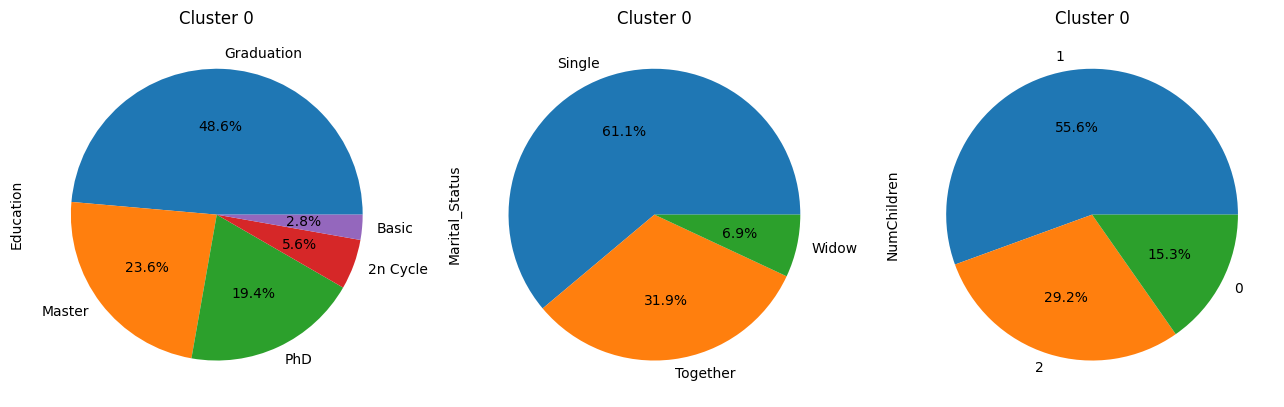

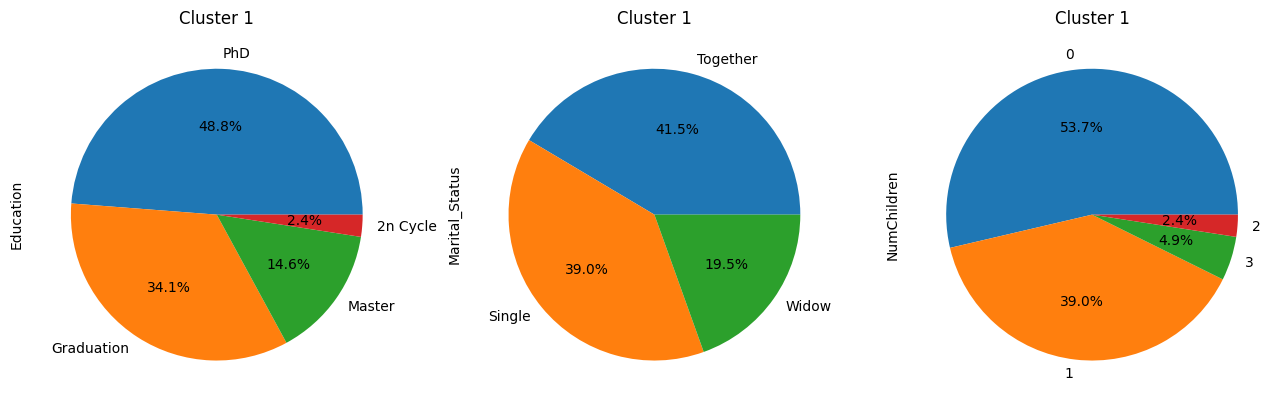

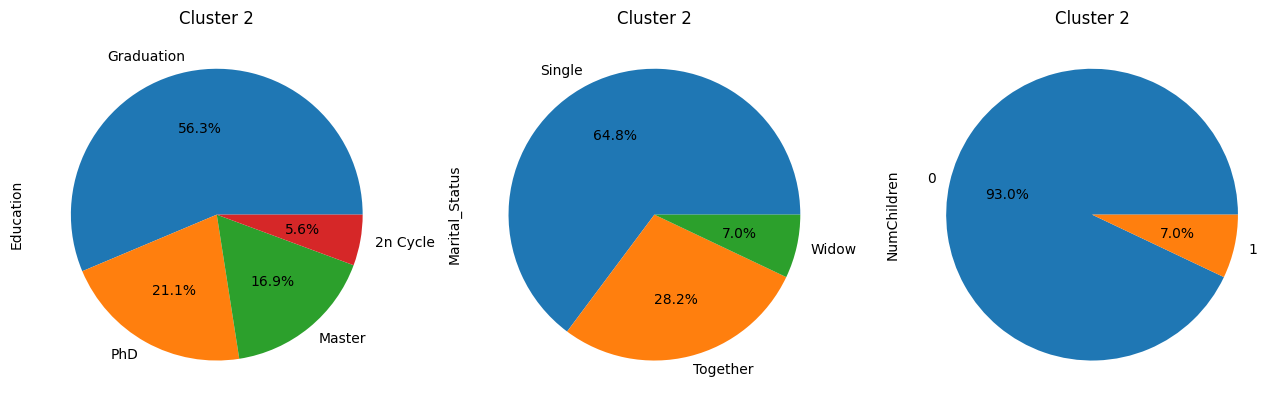

In [384]:
plot_cluster_results(new_acc_cmp_data)

In [385]:
new_acc_cmp_data[new_acc_cmp_data['Cluster'] == 2].describe()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Income,Kidhome,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,Year_Birth,MntRegProds,MntTotal,Days_With_Company,NumTotalPurchases,NumAcceptedCmp,CustomerAge,NumChildren,Cluster
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0
mean,0.464789,0.098592,0.126761,0.295775,0.605634,0.014085,83210.126761,0.014085,87.929577,65.112676,77.295775,594.704225,69.957746,887.605634,6.591549,0.985915,8.000000,5.521127,3.140845,39.830986,1.0,0.056338,1971.577465,1628.014085,1705.309859,598.211268,20.112676,2.591549,42.422535,0.070423,2.0
std,0.502309,0.300235,0.335073,0.459639,0.492193,0.118678,8937.991166,0.118678,62.474983,50.130843,62.010919,261.231063,51.964119,294.707093,2.510421,0.870024,2.730777,2.209455,1.791215,25.482199,0.0,0.232214,14.187179,335.719291,327.177173,188.331161,4.568680,1.248742,14.187179,0.257679,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64509.000000,0.000000,0.000000,0.000000,0.000000,102.000000,0.000000,162.000000,2.000000,0.000000,4.000000,2.000000,1.000000,1.000000,1.0,0.000000,1946.000000,799.000000,967.000000,172.000000,11.000000,1.000000,19.000000,0.000000,2.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75801.000000,0.000000,40.000000,26.000000,33.000000,418.500000,26.500000,708.000000,4.500000,1.000000,6.000000,4.000000,2.000000,17.500000,1.0,0.000000,1959.500000,1390.000000,1484.500000,470.000000,17.500000,2.000000,31.000000,0.000000,2.0
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,82800.000000,0.000000,69.000000,46.000000,51.000000,653.000000,55.000000,899.000000,6.000000,1.000000,8.000000,5.000000,3.000000,36.000000,1.0,0.000000,1972.000000,1614.000000,1707.000000,640.000000,20.000000,2.000000,42.000000,0.000000,2.0
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,89931.500000,0.000000,133.500000,103.500000,118.000000,797.000000,107.000000,1063.500000,8.500000,1.000000,10.000000,7.000000,4.000000,60.500000,1.0,0.000000,1983.000000,1895.000000,1940.000000,766.000000,23.000000,4.000000,54.500000,0.000000,2.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105471.000000,1.000000,250.000000,185.000000,241.000000,974.000000,198.000000,1492.000000,11.000000,7.000000,13.000000,11.000000,9.000000,96.000000,1.0,1.000000,1995.000000,2458.000000,2491.000000,857.000000,31.000000,5.000000,68.000000,1.000000,2.0
